## Load in Data

In [61]:
#Imports
import numpy as np
import pylab as pl
import matplotlib.ticker as ticker
from ae_measure2 import *
import os


mypath = 'C:/Users/tul72/Desktop/phd/projects/pencil_lead_breaks/Data/PLB_data.json'
data = load_PLB(mypath)

waves = data['data']
targets = data['target']
angles = data['target_angle']
print(angles)

['20deg' '22deg' '26deg' '30deg' '40deg']


## Separate Waves by Angle

In [65]:
# 20 degrees
waves_20deg = waves[np.where(targets==0)]
print(f"# of 20 deg waves : {len(waves_20deg)}")

# 22 degrees
waves_22deg = waves[np.where(targets==1)]
print(f"# of 22 deg waves : {len(waves_22deg)}")

# 26 degrees
waves_26deg = waves[np.where(targets==2)]
print(f"# of 26 deg waves : {len(waves_26deg)}")

# 30 degrees
waves_30deg = waves[np.where(targets==3)]
print(f"# of 30 deg waves : {len(waves_30deg)}")

## 36 degrees
#waves_36deg = waves[np.where(targets==4)]
#print(f"# of 36 deg waves : {len(waves_36deg)}")

# 40 degrees
waves_40deg = waves[np.where(targets==4)]
print(f"# of 40 deg waves : {len(waves_40deg)}")

# of 20 deg waves : 145
# of 22 deg waves : 190
# of 26 deg waves : 205
# of 30 deg waves : 161
# of 40 deg waves : 146


## Waveform | Compute 95% Confidence Interval for Mean
https://www.itl.nist.gov/div898/handbook/eda/section3/eda352.htm

# Compute Mean and STD for Wave

In [66]:
from scipy import stats as st # t distribution
from ae_functions import *

# 20 degrees
N_20deg = len(waves_20deg) # number of samples
mean_waves_20deg = np.mean(waves_20deg, axis=0) # average each column over all examples
std_waves_20deg = np.std(waves_20deg, axis=0)   # standard deviation
t95_20deg=st.t.ppf(1-0.025,N_20deg-1)
ci_20deg=t95_20deg*std_waves_20deg
ci_mean_20deg=t95_20deg*std_waves_20deg/np.sqrt(N_20deg)
upper_waves_20deg = mean_waves_20deg + ci_20deg
lower_waves_20deg = mean_waves_20deg - ci_20deg

# 22 degrees
N_22deg = len(waves_22deg) # number of samples
mean_waves_22deg = np.mean(waves_22deg, axis=0) # average each column over all examples
std_waves_22deg = np.std(waves_22deg, axis=0)   # standard deviation
t95_22deg=st.t.ppf(1-0.025,N_22deg-1)
ci_22deg=t95_22deg*std_waves_22deg
ci_mean_22deg=t95_22deg*std_waves_22deg/np.sqrt(N_22deg)
upper_waves_22deg = mean_waves_22deg + ci_22deg
lower_waves_22deg = mean_waves_22deg - ci_22deg

# 26 degrees
N_26deg = len(waves_26deg) # number of samples
mean_waves_26deg = np.mean(waves_26deg, axis=0) # average each column over all examples
std_waves_26deg = np.std(waves_26deg, axis=0)   # standard deviation
t95_26deg=st.t.ppf(1-0.025,N_26deg-1)
ci_26deg=t95_26deg*std_waves_26deg
ci_mean_26deg=t95_26deg*std_waves_26deg/np.sqrt(N_26deg)
upper_waves_26deg = mean_waves_26deg + ci_26deg
lower_waves_26deg = mean_waves_26deg - ci_26deg

# 30 degrees
N_30deg = len(waves_30deg) # number of samples
mean_waves_30deg = np.mean(waves_30deg, axis=0) # average each column over all examples
std_waves_30deg = np.std(waves_30deg, axis=0)   # standard deviation
t95_30deg=st.t.ppf(1-0.025,N_30deg-1)
ci_30deg=t95_30deg*std_waves_30deg
ci_mean_30deg=t95_30deg*std_waves_30deg/np.sqrt(N_30deg)
upper_waves_30deg = mean_waves_30deg + ci_30deg
lower_waves_30deg = mean_waves_30deg - ci_30deg

# 36 degrees
N_36deg = len(waves_36deg) # number of samples
mean_waves_36deg = np.mean(waves_36deg, axis=0) # average each column over all examples
std_waves_36deg = np.std(waves_36deg, axis=0)   # standard deviation
t95_36deg=st.t.ppf(1-0.025,N_36deg-1)
ci_36deg=t95_36deg*std_waves_36deg
ci_mean_36deg=t95_36deg*std_waves_36deg/np.sqrt(N_36deg)
upper_waves_36deg = mean_waves_36deg + ci_36deg
lower_waves_36deg = mean_waves_36deg - ci_36deg

# 40 degrees
N_40deg = len(waves_40deg) # number of samples
mean_waves_40deg = np.mean(waves_40deg, axis=0) # average each column over all examples
std_waves_40deg = np.std(waves_40deg, axis=0)   # standard deviation
t95_40deg=st.t.ppf(1-0.025,N_40deg-1)
ci_40deg=t95_40deg*std_waves_40deg
ci_mean_40deg=t95_40deg*std_waves_40deg/np.sqrt(N_40deg)
upper_waves_40deg = mean_waves_40deg + ci_40deg
lower_waves_40deg = mean_waves_40deg - ci_40deg

# Plot Waveforms 

In [2]:
# Plot the averaged waveforms
fig,spec2 = create_figure('',columns=1,rows=1,width=8,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

sig_len = 1024
dt = 10*-7
duration = sig_len*dt*10**6 # convert to us
time = np.linspace(0,duration,sig_len) # discretization of signal time
    
ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_waves_40deg,'-',label = '40 deg', color='blue')
#ax.plot(time,mean_waves_36deg,'-',label = '36 deg', color='magenta')
ax.plot(time,mean_waves_30deg,'-',label = '30 deg', color='red')
ax.plot(time,mean_waves_26deg,'-',label = '26 deg', color='purple')
ax.plot(time,mean_waves_22deg,'-',label = '22 deg', color='black')
ax.plot(time,mean_waves_20deg,'-',label = '20 deg', color='green')
ax.set_title('Mean PLB AE Waveforms | 220426_PLB_data')

plt.legend()
ax.set_xlim([0,duration])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')

plt.grid()
plt.show()

NameError: name 'create_figure' is not defined

## Compute FFT for All Examples at Each Angle

In [68]:
# Compute FFTs
low_pass = 0             # [Hz] ; low frequency cutoff
high_pass = 800*10**3    # [Hz] ; high frequency cutoff\
dt = 10**-7              # [seconds] ; sample period / time between samples
fft_units = 1000 

# 20 deg
fft_20deg = []
for idx,wave in enumerate(waves_20deg):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft_20deg.append(z)
fft_20deg = np.array(fft_20deg)

# 22 deg
fft_22deg = []
for idx,wave in enumerate(waves_22deg):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft_22deg.append(z)
fft_22deg = np.array(fft_22deg)

# 26 deg
fft_26deg = []
for idx,wave in enumerate(waves_26deg):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft_26deg.append(z)
fft_26deg = np.array(fft_26deg)

# 30 deg
fft_30deg = []
for idx,wave in enumerate(waves_30deg):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft_30deg.append(z)
fft_30deg = np.array(fft_30deg)

# 36 deg
fft_36deg = []
for idx,wave in enumerate(waves_36deg):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft_36deg.append(z)
fft_36deg = np.array(fft_36deg)

# 40 deg
fft_40deg = []
for idx,wave in enumerate(waves_40deg):
    w,z = fft(dt, wave, low_pass, high_pass)
    fft_40deg.append(z)
fft_40deg = np.array(fft_40deg)

w = w/fft_units; # khz
print(f"# of discrete freq points for each ex: {len(w)}") # same for each wave, since freq range & dt constant

# of discrete freq points for each ex: 81


## FFT | Compute 95% Confidence Interval for Mean
https://www.itl.nist.gov/div898/handbook/eda/section3/eda352.htm

# Compute Mean FFT

In [69]:
from scipy import stats as st # t distribution
from ae_functions import *

# 20 degrees
N_20deg = len(fft_20deg) # number of samples
mean_fft_20deg = np.mean(fft_20deg, axis=0) # average each column over all examples
std_fft_20deg = np.std(fft_20deg, axis=0)   # standard deviation
t95_20deg=st.t.ppf(1-0.025,N_20deg-1)
ci_20deg=t95_20deg*std_fft_20deg
ci_mean_20deg=t95_20deg*std_fft_20deg/np.sqrt(N_20deg)
upper_fft_20deg = mean_fft_20deg + ci_20deg
lower_fft_20deg = mean_fft_20deg - ci_20deg

# 22 degrees
N_22deg = len(fft_22deg) # number of samples
mean_fft_22deg = np.mean(fft_22deg, axis=0) # average each column over all examples
std_fft_22deg = np.std(fft_22deg, axis=0)   # standard deviation
t95_22deg=st.t.ppf(1-0.025,N_22deg-1)
ci_22deg=t95_22deg*std_fft_22deg
ci_mean_22deg=t95_22deg*std_fft_22deg/np.sqrt(N_22deg)
upper_fft_22deg = mean_fft_22deg + ci_22deg
lower_fft_22deg = mean_fft_22deg - ci_22deg

# 26 degrees
N_26deg = len(fft_26deg) # number of samples
mean_fft_26deg = np.mean(fft_26deg, axis=0) # average each column over all examples
std_fft_26deg = np.std(fft_26deg, axis=0)   # standard deviation
t95_26deg=st.t.ppf(1-0.025,N_26deg-1)
ci_26deg=t95_26deg*std_fft_26deg
ci_mean_26deg=t95_26deg*std_fft_26deg/np.sqrt(N_26deg)
upper_fft_26deg = mean_fft_26deg + ci_26deg
lower_fft_26deg = mean_fft_26deg - ci_26deg

# 30 degrees
N_30deg = len(fft_30deg) # number of samples
mean_fft_30deg = np.mean(fft_30deg, axis=0) # average each column over all examples
std_fft_30deg = np.std(fft_30deg, axis=0)   # standard deviation
t95_30deg=st.t.ppf(1-0.025,N_30deg-1)
ci_30deg=t95_30deg*std_fft_30deg
ci_mean_30deg=t95_30deg*std_fft_30deg/np.sqrt(N_30deg)
upper_fft_30deg = mean_fft_30deg + ci_30deg
lower_fft_30deg = mean_fft_30deg - ci_30deg

# 36 degrees
N_36deg = len(fft_36deg) # number of samples
mean_fft_36deg = np.mean(fft_36deg, axis=0) # average each column over all examples
std_fft_36deg = np.std(fft_36deg, axis=0)   # standard deviation
t95_36deg=st.t.ppf(1-0.025,N_36deg-1)
ci_36deg=t95_36deg*std_fft_36deg
ci_mean_36deg=t95_36deg*std_fft_36deg/np.sqrt(N_36deg)
upper_fft_36deg = mean_fft_36deg + ci_36deg
lower_fft_36deg = mean_fft_36deg - ci_36deg

# 40 degrees
N_40deg = len(fft_40deg) # number of samples
mean_fft_40deg = np.mean(fft_40deg, axis=0) # average each column over all examples
std_fft_40deg = np.std(fft_40deg, axis=0)   # standard deviation
t95_40deg=st.t.ppf(1-0.025,N_40deg-1)
ci_40deg=t95_40deg*std_fft_40deg
ci_mean_40deg=t95_40deg*std_fft_40deg/np.sqrt(N_40deg)
upper_fft_40deg = mean_fft_40deg + ci_40deg
lower_fft_40deg = mean_fft_40deg - ci_40deg

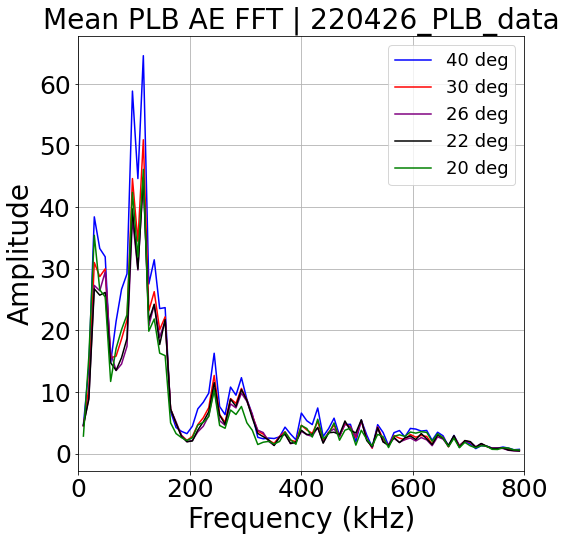

In [70]:
# Plot the averaged waveforms
fig,spec2 = create_figure('',columns=1,rows=1,width=8,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft_40deg,'-',label = '40 deg', color='blue')
#ax.plot(w,mean_fft_36deg,'-',label = '36 deg', color='magenta')
ax.plot(w,mean_fft_30deg,'-',label = '30 deg', color='red')
ax.plot(w,mean_fft_26deg,'-',label = '26 deg', color='purple')
ax.plot(w,mean_fft_22deg,'-',label = '22 deg', color='black')
ax.plot(w,mean_fft_20deg,'-',label = '20 deg', color='green')
ax.set_title('Mean PLB AE FFT | 220426_PLB_data')

ax.set_xlim([0,high_pass/fft_units])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()